<a href="https://colab.research.google.com/github/aldodec/ML_Notebooks/blob/master/Advice_For_Teens_Wordclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Loading and Processing

In [ ]:
## The Advice for Teens dataset

url = 'https://raw.githubusercontent.com/omdena/botnar/master/data/reddit_data/AdviceForTeens_data.csv?token=AMIUXMC3QJNGPBSLZBN7QZS65JQF4'
df = pd.read_csv(url,error_bad_lines=False,index_col=0)
df.head()

,ID,is_Original,Flair,num_comments,Title,Subreddit,Body,URL,Upvotes,Comments,creation_date
0,fcpbui,False,NaN,13,Can't have sex the same,AdviceForTeens,"I'm in a relationship of 2 years, naturally be...",https://www.reddit.com/r/AdviceForTeens/commen...,24,Have you tried trying your hardest to just con...,2020-03-03 12:39:21
1,fbtk1w,False,NaN,3,How to break up with a friend in the most peac...,AdviceForTeens,I’d love for us to slide off of each other but...,https://www.reddit.com/r/AdviceForTeens/commen...,18,there’s really two ways you can do this.\nthe ...,2020-03-01 20:44:48
2,1681jg,False,NaN,4,[MODPOST] [META] Lets bring this subreddit bac...,AdviceForTeens,Hey everyone! I'm one of your friendly neighbo...,https://www.reddit.com/r/AdviceForTeens/commen...,21,Me: http://i.imgur.com/QqKyW.jpg\n\nI also am ...,2013-01-09 10:23:30
3,fcmxds,False,NaN,0,The most important thing when texting a girl i...,AdviceForTeens,Here are some tips on how to text a girl and s...,https://www.reddit.com/r/AdviceForTeens/commen...,18,NaN,2020-03-03 09:33:01
4,f9gz1a,False,NaN,15,"My dad found my porn, help",AdviceForTeens,So.. I got a virus onto my laptop so my dad de...,https://www.reddit.com/r/AdviceForTeens/commen...,18,"How old are you? If you’re of reasonable age, ...",2020-02-26 04:51:52


In [ ]:
df.columns

Index(['ID', 'is_Original', 'Flair', 'num_comments', 'Title', 'Subreddit',
       'Body', 'URL', 'Upvotes', 'Comments', 'creation_date'],
      dtype='object')

In [ ]:
df['Comments']= df['Comments'].replace(np.nan,'')
df['Title_len'] = df['Title'].apply(len)
df['Body_len'] = df['Body'].apply(len)
df['Comments_len'] = df['Comments'].apply(len)

## Basic EDA

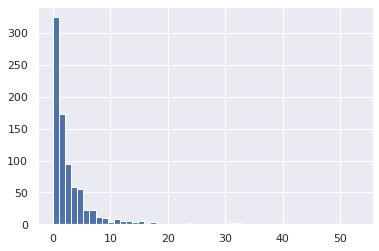

In [ ]:
plt.hist(df['num_comments'],bins=50)
plt.show()

In [ ]:
df['num_comments'].describe()

count    818.000000
mean       3.169927
std        4.499610
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       53.000000
Name: num_comments, dtype: float64

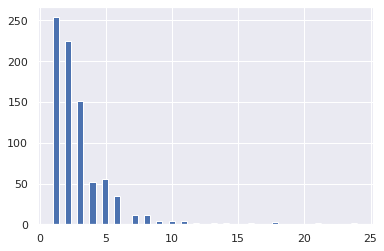

In [ ]:
plt.hist(df['Upvotes'],bins=50)
plt.show()

In [ ]:
df['Upvotes'].describe()

count    818.000000
mean       2.830073
std        2.446835
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       24.000000
Name: Upvotes, dtype: float64

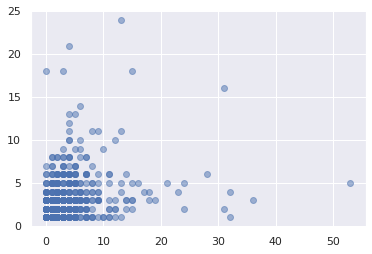

In [ ]:
plt.scatter(df['num_comments'],df['Upvotes'],alpha = 0.5)
plt.show()

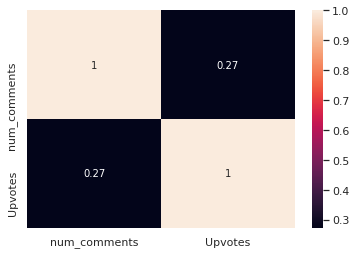

In [ ]:
sns.heatmap(df[['num_comments','Upvotes']].corr(),annot=True)

## Basic Time Analysis

In [ ]:
## Basic Time Analysis

In [ ]:
df['creation_date']=pd.to_datetime(df['creation_date'])

In [ ]:
df['year'] = df['creation_date'].apply(lambda x: x.year)
df['month'] = df['creation_date'].apply(lambda x: x.month)
df['day'] = df['creation_date'].apply(lambda x: x.day)
df['hour'] = df['creation_date'].apply(lambda x: x.hour)
df['minute'] = df['creation_date'].apply(lambda x: x.minute)

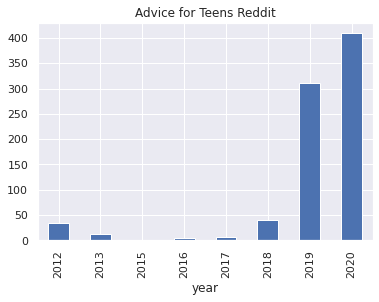

In [ ]:
df.groupby('year')['ID'].count().plot(kind='bar')
plt.title('Advice for Teens Reddit')
plt.show()

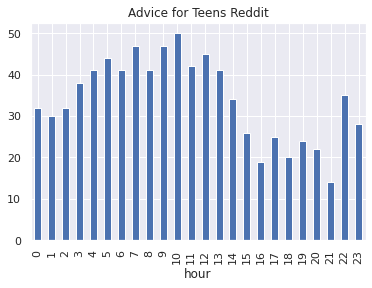

In [ ]:
df.groupby('hour')['ID'].count().plot(kind='bar')
plt.title('Advice for Teens Reddit')
plt.show()

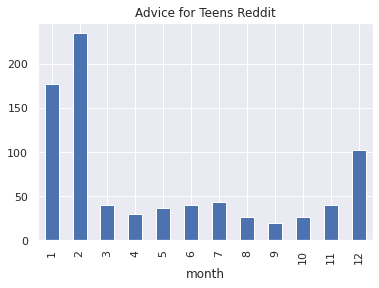

In [ ]:
df.groupby('month')['ID'].count().plot(kind='bar')
plt.title('Advice for Teens Reddit')
plt.show()

## Text Length

In [ ]:
### Text content length

In [ ]:
df['Comments']= df['Comments'].replace(np.nan,'')
df['Title_len'] = df['Title'].apply(len)
df['Body_len'] = df['Body'].apply(len)
df['Comments_len'] = df['Comments'].apply(len)

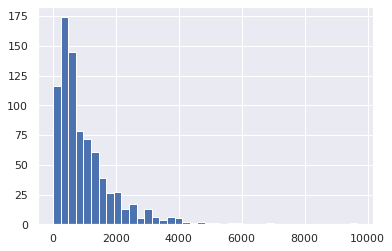

In [ ]:
df['Body_len'].hist(bins=40)

In [ ]:
df['Body_len'].describe()

count     818.000000
mean      995.782396
std       975.638044
min         1.000000
25%       351.000000
50%       679.500000
75%      1307.250000
max      9675.000000
Name: Body_len, dtype: float64

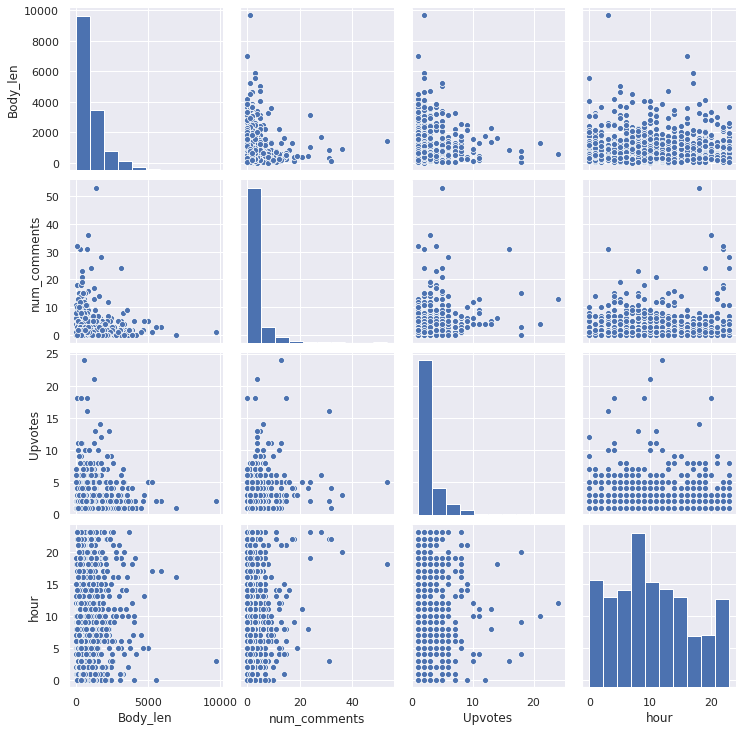

In [ ]:
sns.pairplot(df[['Body_len','num_comments','Upvotes','hour']])

## Wordcloud

In [ ]:
### Wordcloud

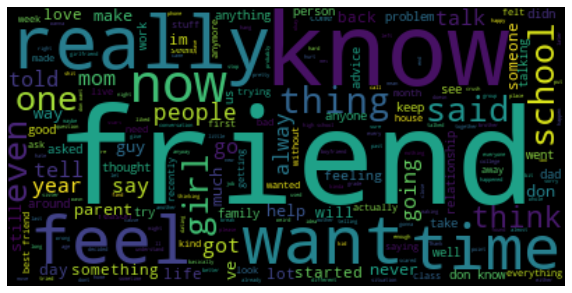

In [ ]:
body_words = ' '.join(text for text in df['Body'])
wordcloud_body = WordCloud().generate(body_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_body, interpolation='bilinear')
plt.axis("off")
plt.show()

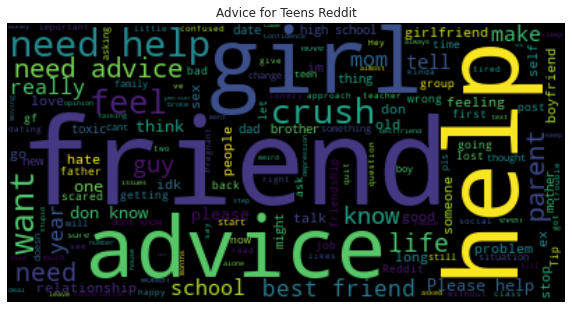

In [ ]:
title_words = ' '.join(text for text in df['Title'])
wordcloud_title = WordCloud().generate(title_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")
plt.title('Advice for Teens Reddit')
plt.show()

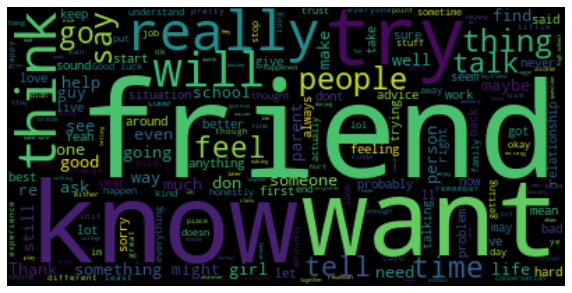

In [ ]:
comments_words = ' '.join(text for text in df['Comments'])
wordcloud_comments = WordCloud().generate(comments_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.axis("off")
plt.show()

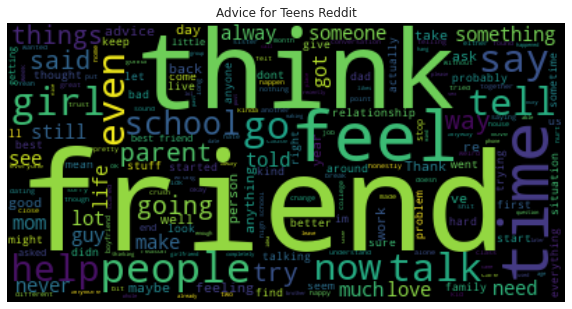

In [ ]:
total_words =' '.join({title_words,body_words,comments_words})
stopwords = set(STOPWORDS)
stopwords.update(['really','one','thing','know','will','want','really','know','don'])

wordcloud_total = WordCloud(stopwords=stopwords).generate(total_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_total, interpolation='bilinear')
plt.title('Advice for Teens Reddit')
plt.axis("off")
plt.show()

## N-grams

In [ ]:
len(total_words)

1468851

## Sandbox

In [ ]:
def get_bitrigrams(full_text, threshold=30):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    trigram_measures = TrigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    finder = TrigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    trigrams = {" ".join(words): "_".join(words)
                for words in finder.above_score(trigram_measures.likelihood_ratio, threshold)}
    return bigrams, trigrams

#===============================================================================
def replace_bitrigrams(text, bigrams, trigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in trigrams.items():
            t_new = t_new.replace(k, v)
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts

#===============================================================================
def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text

#===============================================================================
def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    very_processed_texts = replace_bitrigrams(processed_texts, bigrams, trigrams)
    return " ".join(very_processed_texts)

In [ ]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop)) #
    bigrams, trigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = [] #
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ") #
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)

#===============================================================================
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").\
    generate(use_ngrams_only(records["title"], wordnet_lemmatizer, translate_table, stop))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#===============================================================================
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").\
    generate(use_ngrams_only(records["abstract"], wordnet_lemmatizer, translate_table, stop))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from nltk import BigramAssocMeasures,BigramCollocationFinder

In [ ]:
text = total_words

In [ ]:
threshold=30
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text.split())
finder.apply_freq_filter(3)
bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}

In [ ]:
#for k,v in bigrams.items():
 # print(k,'//',v)

In [ ]:
text

'Can\'t have sex the same How to break up with a friend in the most peaceful way possible? [MODPOST] [META] Lets bring this subreddit back from the dead. ~ please upvote. self post, no karma.  The most important thing when texting a girl is you should utilize the phone as a tool to set a date not texting back and forth. If you text a girl back and fourth it kills the mystery and it kills the fun of getting to know each other in person. My dad found my porn, help How to tell my parents I want to get medical advice on my mental health Golden advice that can help you If you need advice I’ve got some for you Everything’s changing I’m 14 and I lied about having a gf and a girl with that exact name started at my school Advice on crushes? I’m 13 and I still play with toys, and everyone (including my family) makes fun of me for it. What do I do? I cant move on How do I make existing worth it? I think I’m bi. What do I do? Am i in the wrong with my parents I’m very tired and don’t want to be 16

In [ ]:
df_toy = pd.DataFrame({'ID':[0,1,2,3],'Doc':['Aldo Dector','Ese es mi nombre','Oliver es un apellido','Fisico']})

In [ ]:
df_toy

,ID,Doc
0,0,Aldo Dector
1,1,Ese es mi nombre
2,2,Oliver es un apellido
3,3,Fisico


In [ ]:
for index, doc in enumerate(df_toy['Doc']):
  print(index,doc)

0 Aldo Dector
1 Ese es mi nombre
2 Oliver es un apellido
3 Fisico


In [ ]:
toy_list = ['Aldo','Jose es un niño','Maria va a la escuela']

In [ ]:
" ".join(toy_list)

'Aldo Jose es un niño Maria va a la escuela'

In [ ]:
indexed_texts = []
current_doc = [] #
for k, v in bigrams.items():
  current_doc += [v] * text.count(" " + k + " ")
  #indexed_texts.append(" ".join(current_doc))
  full_bigram = " ".join(current_doc)

In [ ]:
type(indexed_texts),len(indexed_texts)

(list, 3763)

In [ ]:
indexed_texts

'want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to

In [ ]:
" ".join(current_doc)

'want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to want_to

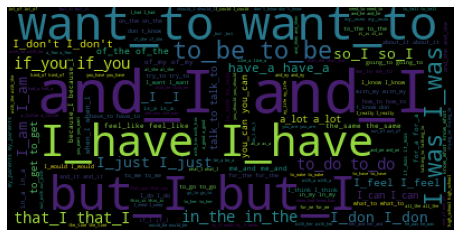

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).\
    generate(full_bigram)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
bigrams

{'want to': 'want_to',
 'a lot': 'a_lot',
 'the same': 'the_same',
 'feel like': 'feel_like',
 'I am': 'I_am',
 'to be': 'to_be',
 'know what': 'know_what',
 'if you': 'if_you',
 'talk to': 'talk_to',
 'I was': 'I_was',
 'in the': 'in_the',
 "I don't": "I_don't",
 'I have': 'I_have',
 'don’t know': 'don’t_know',
 'going to': 'going_to',
 'I don’t': 'I_don’t',
 'my mom': 'my_mom',
 "don't know": "don't_know",
 'kind of': 'kind_of',
 'try to': 'try_to',
 'lot of': 'lot_of',
 'to do': 'to_do',
 'you can': 'you_can',
 'to get': 'to_get',
 'high school': 'high_school',
 'If you': 'If_you',
 'have a': 'have_a',
 'trying to': 'trying_to',
 'know how': 'know_how',
 'my parents': 'my_parents',
 'I feel': 'I_feel',
 'a few': 'a_few',
 'hang out': 'hang_out',
 'but I': 'but_I',
 'told me': 'told_me',
 'a little': 'a_little',
 'would be': 'would_be',
 'out of': 'out_of',
 'to talk': 'to_talk',
 'able to': 'able_to',
 'it was': 'it_was',
 'we were': 'we_were',
 'one of': 'one_of',
 'my dad': 'my_da

In [ ]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop)) #list
    bigrams, trigrams = get_bitrigrams(processed_texts) # dictionaries
    indexed_texts = []
    for doc in processed_texts: # doc: elements in list
        current_doc = [] 
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ") #
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)


In [ ]:
current_doc = [] #
for k, v in bigrams.items():
  current_doc += [v] * text.count(" " + k + " ")
  #indexed_texts.append(" ".join(current_doc))

In [ ]:
#current_doc

In [ ]:
text_list = [text]

In [ ]:
text.count( 'fire' )

18

In [ ]:
bigrams

{'want to': 'want_to',
 'a lot': 'a_lot',
 'the same': 'the_same',
 'feel like': 'feel_like',
 'I am': 'I_am',
 'to be': 'to_be',
 'know what': 'know_what',
 'if you': 'if_you',
 'talk to': 'talk_to',
 'I was': 'I_was',
 'in the': 'in_the',
 "I don't": "I_don't",
 'I have': 'I_have',
 'don’t know': 'don’t_know',
 'going to': 'going_to',
 'I don’t': 'I_don’t',
 'my mom': 'my_mom',
 "don't know": "don't_know",
 'kind of': 'kind_of',
 'try to': 'try_to',
 'lot of': 'lot_of',
 'to do': 'to_do',
 'you can': 'you_can',
 'to get': 'to_get',
 'high school': 'high_school',
 'If you': 'If_you',
 'have a': 'have_a',
 'trying to': 'trying_to',
 'know how': 'know_how',
 'my parents': 'my_parents',
 'I feel': 'I_feel',
 'a few': 'a_few',
 'hang out': 'hang_out',
 'but I': 'but_I',
 'told me': 'told_me',
 'a little': 'a_little',
 'would be': 'would_be',
 'out of': 'out_of',
 'to talk': 'to_talk',
 'able to': 'able_to',
 'it was': 'it_was',
 'we were': 'we_were',
 'one of': 'one_of',
 'my dad': 'my_da

In [ ]:
" ".join(df['Title'].values)

'Can\'t have sex the same How to break up with a friend in the most peaceful way possible? [MODPOST] [META] Lets bring this subreddit back from the dead. ~ please upvote. self post, no karma.  The most important thing when texting a girl is you should utilize the phone as a tool to set a date not texting back and forth. If you text a girl back and fourth it kills the mystery and it kills the fun of getting to know each other in person. My dad found my porn, help How to tell my parents I want to get medical advice on my mental health Golden advice that can help you If you need advice I’ve got some for you Everything’s changing I’m 14 and I lied about having a gf and a girl with that exact name started at my school Advice on crushes? I’m 13 and I still play with toys, and everyone (including my family) makes fun of me for it. What do I do? I cant move on How do I make existing worth it? I think I’m bi. What do I do? Am i in the wrong with my parents I’m very tired and don’t want to be 16

In [ ]:
######################################

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #ords = [ps.stem(w) for w in words] #4
    return words ##### returns a list

In [ ]:
from nltk.util import ngrams

## Helper Functions
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(x, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(df[df.author == x]['text']),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out


gram_table(x="EAP", gram=[1,2,3,4], length=20)

In [ ]:
text = df['Title'].str.lower().str.cat(sep=' ')

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

tokenizer.tokenize(txt)

LookupError: ignored

In [ ]:
import nltk
nltk.download('stopwords')